In [1]:
#define ltstm model in tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Bidirectional, TimeDistributed, Conv1D, Flatten, MaxPooling1D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import activations

# Define the LSTM model
# load data from 'phi_q_t_ps_pca.npy'
import numpy as np

# load data
data1 = np.load('phi_q_t_ps_pca.npy')
data2 = np.load('uvgrid_pca.npy')

concatenated_data = np.concatenate((data1, data2), axis=-1)


def define_model(n_timesteps, n_features, n_outputs):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(optimizer='adam', loss='mse')
    return model


(14612, 600)
[[1.         0.13382775]
 [0.13382775 1.        ]]


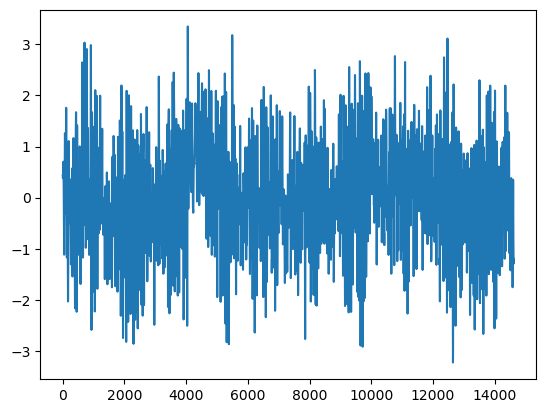

In [45]:
print(concatenated_data.shape)
# scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
scaler.fit(concatenated_data)   
concatenated_data_scaled = scaler.transform(concatenated_data)
print(np.corrcoef(concatenated_data_scaled[:-10,50], concatenated_data_scaled[10:,50]))
import matplotlib.pyplot as plt

plt.plot(concatenated_data_scaled[:,306])